<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Hubble_Lemaitre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request #usar biblioteca Pandas para ler o arquivo como um DataFrame e pular a primeira linha com o cabeçalho
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sympy as sm
import scipy as sp
import math

In [18]:
# 1) BAIXANDO O ARQUIVO

url = "https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat"
filename = "Pantheon+SH0ES.dat"

urllib.request.urlretrieve(url, filename)

('Pantheon+SH0ES.dat', <http.client.HTTPMessage at 0x7f6789af61f0>)

In [3]:
# 2) GERANDO O GRÁFICO COM OS DADOS DO CATÁLOGO PANTHEON+

#primeira linha do arquivo contém o cabeçalho da tabela, com nomes de colunas e outros metadados, e não dados numéricos.
df = pd.read_csv(filename, skiprows=2, delim_whitespace=True, names=['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL', 'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES', 'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF', 'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c', 'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC', 'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS', 'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB', 'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b', 'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD'])
# skiprows=1, especifica que o arquivo está separado por espaços em branco com o argumento delim_whitespace=True, e nomeia as colunas do DataFrame com o argumento names.


In [4]:
# definindo as variáveis de acordo com os dados fornecidos
mu = df["MU_SH0ES"]
zCMB = df["zCMB"]

# definindo constantes
c = 2.9*10**5 # velocidade da luz
h0 = 70 #km/s/Mpc

# definindo a velocidade
v = c*zCMB #(km/s)

# definindo os erros
muerr = df["MU_SH0ES_ERR_DIAG"]
zCMBerr = df["zCMBERR"]
verr = np.sqrt((c**2)*((zCMBerr)**2))

# Vamos plotar $d_L$ x $z$. Porém, os dados fornecidos são do módulo da distância de luminosidade $\mu$. Logo, precisamos fazer a conversão para a distância de luminosidade.

In [5]:
# convertendo para a distância de luminosidade
Dl= np.power(10, ((mu-25)/5))

# erro da distância de luminosidade
Dlerr = np.sqrt(((2**((mu/5)-5)*(5**((mu/5)-6))*np.log(10))**2)*((muerr)**2))

# Agora, vamos fazer um recorte nos dados para plotar a Lei de Hubble-Lemaître.

In [6]:
#Recorte com Máscara
mask = zCMB <= 0.06

#Intervalos diferentes
# mask = (zCMB <= 0.06) & (zCMB >= 0.02)

#Novos valores com o recorte
DL = Dl[mask]
vu = v[mask]
DLerr = Dlerr[mask]
vuerr = verr[mask]
zCMB1 = zCMB[mask]

In [8]:
len(DL) # tamanho de dl após a máscara/corte

677

In [9]:
len(zCMB1) # tamanho de zCMB após a máscara/corte

677

In [10]:
DL.max() #ver o valor máximo após a máscara

268.6581377268703

In [11]:
DL.min() # ver o valor mínimo após a máscara

6.474108895090392

In [12]:
# Lei de Hubble-Lemaître
def f(x, H):
  return H*x

# fazendo o ajuste da nossa função  
curve = curve_fit(f, DL, vu) # primeiro é a função e depois as variáveis
H0 = round(curve[0][0], 2) #valor do fit, ele vem no 00 da matriz, o 2 é o número de casas decimais
He = round(curve[1][0][0], 2) #valor do erro do fit

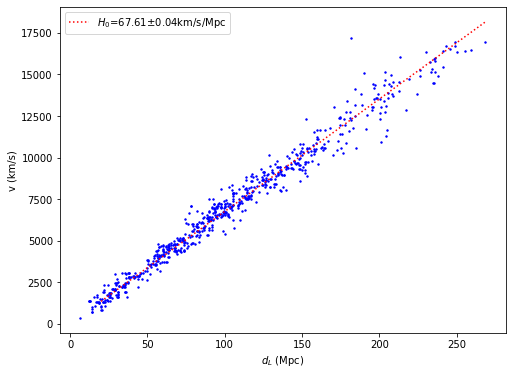

In [15]:
# plotando a Lei de Hubble-Lemaître sem considerar as barras de erro
x=np.arange(20, 270)
plt.figure(figsize=(8, 6))
plt.scatter(DL, vu, s=2, color="blue") # s muda o tamanho do ponto
# não precisa do plt.scatter se for usar o plt.errorbar porque nele já colocamos o que queremos plotar
plt.plot(x,f(x,curve[0]), color='red', label='$H_{0}$='+str(H0)+'$\pm$'+str(He)+'km/s/Mpc', linestyle=":")
plt.xlabel("$d_L$ (Mpc)")
plt.ylabel("v (km/s)")
plt.legend()
plt.show()

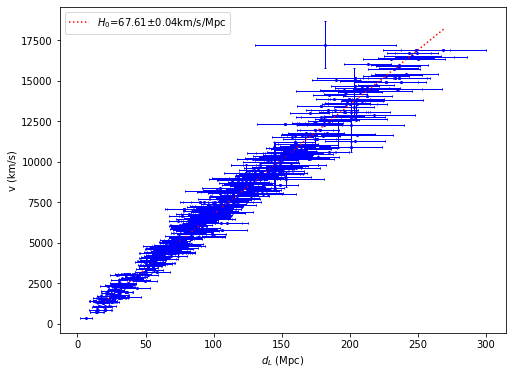

In [16]:
# agora, vamos plotar a Lei de Hubble-Lemaître com as barras de erro
x=np.arange(20, 270)
plt.figure(figsize=(8, 6))
plt.errorbar(DL, vu, xerr = DLerr, yerr = vuerr, color = 'blue', fmt='o', markersize=2, elinewidth=1, capsize=1) #definir as expressões dos desvios de DL e vu e substitui
# markersize - tamanho do ponto
# elinewidth -  grossura da barra de erro
# capsize - tamanho da barra de erro
plt.plot(x,f(x,curve[0]), color='red', label='$H_{0}$='+str(H0)+'$\pm$'+str(He)+'km/s/Mpc', linestyle=":")
plt.xlabel("$d_L$ (Mpc)")
plt.ylabel("v (km/s)")
plt.legend()
plt.show()

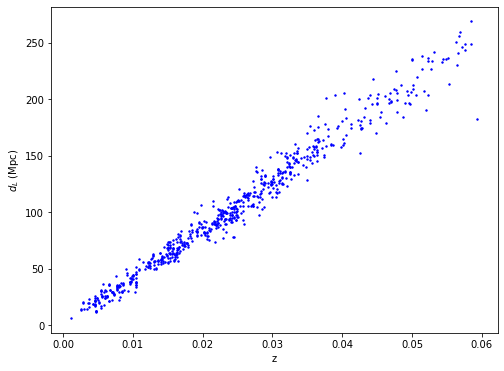

In [17]:
# vamos plotar distância de luminosidade x z sem a curva de ajuste e as barras de erro para a máscara que estabelecemos
plt.figure(figsize=(8, 6))
plt.scatter(zCMB1, DL, s=2, color="blue")
plt.xlabel("z")
plt.ylabel("$d_L$ (Mpc)")
plt.show()